In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


drop unmwanted columns

In [73]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [75]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [76]:
df.duplicated().sum()

0

In [77]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [78]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

visual representation


(array([[  95.,  232.,  201.,  213.,  203.,  209.,  196.,  177.,  197.,
          314.],
        [ 318.,  803.,  847.,  796.,  786.,  803.,  771.,  851.,  828.,
         1160.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

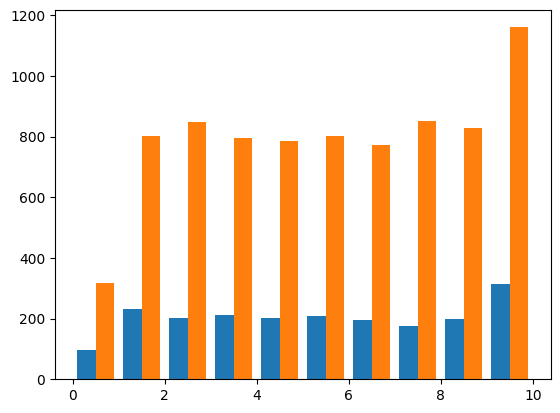

In [79]:
tenure_yes=df[df.Exited==1].Tenure
tenure_no=df[df.Exited==0].Tenure

plt.hist([tenure_yes,tenure_no])

(array([[198., 196., 191., 212., 196., 211., 196., 206., 225., 206.],
        [789., 772., 815., 815., 806., 816., 811., 776., 784., 779.]]),
 array([1.1580000e+01, 2.0009670e+04, 4.0007760e+04, 6.0005850e+04,
        8.0003940e+04, 1.0000203e+05, 1.2000012e+05, 1.3999821e+05,
        1.5999630e+05, 1.7999439e+05, 1.9999248e+05]),
 <a list of 2 BarContainer objects>)

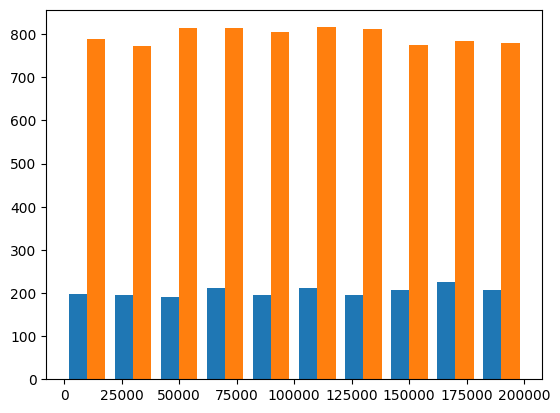

In [80]:
EstimatedSalary_yes=df[df.Exited==1].EstimatedSalary
EstimatedSalary_no=df[df.Exited==0].EstimatedSalary

plt.hist([EstimatedSalary_yes,EstimatedSalary_no])

unique values for each column

In [81]:
for column in df.columns:
  print(f'{column} : ,{df[column].unique()}')

CreditScore : ,[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705

map string values to numeric values

In [82]:
df.Gender=df.Gender.map({'Male':1,'Female':0})

In [83]:
df.Gender.unique()

array([0, 1])

In [84]:
pd.get_dummies(df,columns=['Geography'])

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [85]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [86]:
df.Geography=df.Geography.map({'True':1,'False':0})

In [87]:
df.dtypes

CreditScore          int64
Geography          float64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

scale the values to the columns which has greater values

In [88]:
column_to_scale=['Balance','EstimatedSalary','CreditScore']

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[column_to_scale]=scaler.fit_transform(df[column_to_scale])


In [90]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,NaN,0,42,2,0.000000,1,1,1,0.506735,1
1,0.516,NaN,0,41,1,0.334031,1,0,1,0.562709,0
2,0.304,NaN,0,42,8,0.636357,3,1,0,0.569654,1
3,0.698,NaN,0,39,1,0.000000,2,0,0,0.469120,0
4,1.000,NaN,0,43,2,0.500246,1,1,1,0.395400,0


In [91]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
X=df.drop('Exited',axis=1)
y=df.Exited

model fitting

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_imputed=imputer.fit_transform(X_train)
X_test_imputed=imputer.transform(X_test)

model training

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
!pip install lightgbm
import lightgbm as lgb
from lightgbm import LGBMClassifier
model={
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "LightGradientBoostingMachine": LGBMClassifier(random_state=42)
}

In [94]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
for key,value in model.items():
  value.fit(X_train_imputed,y_train)
  y_pred=value.predict(X_test_imputed)
  print(f'{key} : ')
  print(f'\n confusion matrix: \n',confusion_matrix(y_test,y_pred))
  print(f'\n classification report: \n',classification_report(y_test,y_pred))
  print(f'\n accuracy score: ',accuracy_score(y_test,y_pred))


RandomForestClassifier : 

 confusion matrix: 
 [[1548   59]
 [ 225  168]]

 classification report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1607
           1       0.74      0.43      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000


 accuracy score:  0.858
LogisticRegression : 

 confusion matrix: 
 [[1562   45]
 [ 326   67]]

 classification report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.17      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000


 accuracy score:  0.8145
[LightGBM] [Info] Number of positive: 1644, number of negative: 6356
[LightGBM] [Info] Auto-cho

predicting

In [95]:
def predict_exit(model,input_data):
   input_data = np.array(input_data).reshape(1, -1)
   input_data=imputer.transform(input_data)
   prediction = model["LightGradientBoostingMachine"].predict(input_data)
   if prediction==0:
    print('not churn')
   else:
    print('churn')



In [96]:
predict_exit(model,input_data=[619,0,1,42,2,0,1,1,1,101348.88])


churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
